## Bike-sharing-demand-EDA 
date : 2020-04-09 <br>
[kaggle 참고] https://www.kaggle.com/c/bike-sharing-demand/data <br>
[github 참고] https://github.com/corazzon/KaggleStruggle/blob/master/bike-sharing-demand/bike-sharing-demand-EDA.ipynb <br>
[영상강의 참고] https://programmers.co.kr/learn/courses/21/lessons/942#

------------------------------------------------------------------------------------------------
### Description
* datetime - hourly date + timestamp
* season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

----------------------------------------------------------------------
### what I learned
> 1) 

> 2) 

In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')


### matplotlib 한글폰트 깨짐문제

In [27]:
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [28]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.1.1
설치 위치:  /data1/suhyuncho/.conda/envs/suhyun3/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /data1/suhyuncho/.config/matplotlib
캐시 위치:  /data1/suhyuncho/.cache/matplotlib


In [30]:
print ('설정 파일 위치: ', mpl.matplotlib_fname())

설정 파일 위치:  /data1/suhyuncho/.conda/envs/suhyun3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


In [37]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트 명 만 출력
f[:10]

20


['DejaVu Sans',
 'DejaVu Sans',
 'cmex10',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXGeneral',
 'cmsy10',
 'DejaVu Sans Mono',
 'DejaVu Serif']

### 데이터 불러오기

In [2]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# train.columns
# train.dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [5]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [7]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

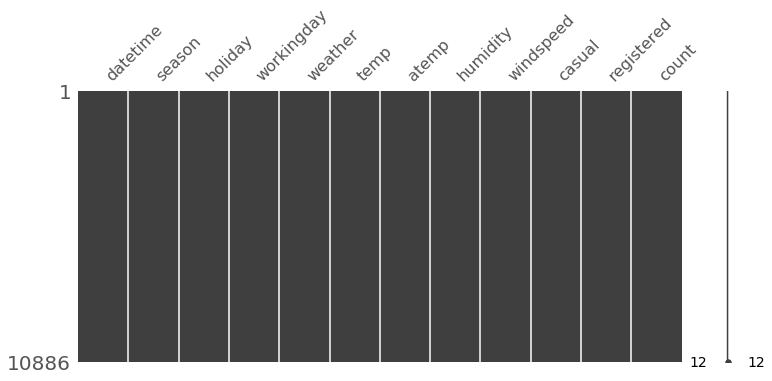

In [8]:
import missingno as msno

msno.matrix(train, figsize=(12,5))

In [16]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape

(10886, 18)

In [17]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


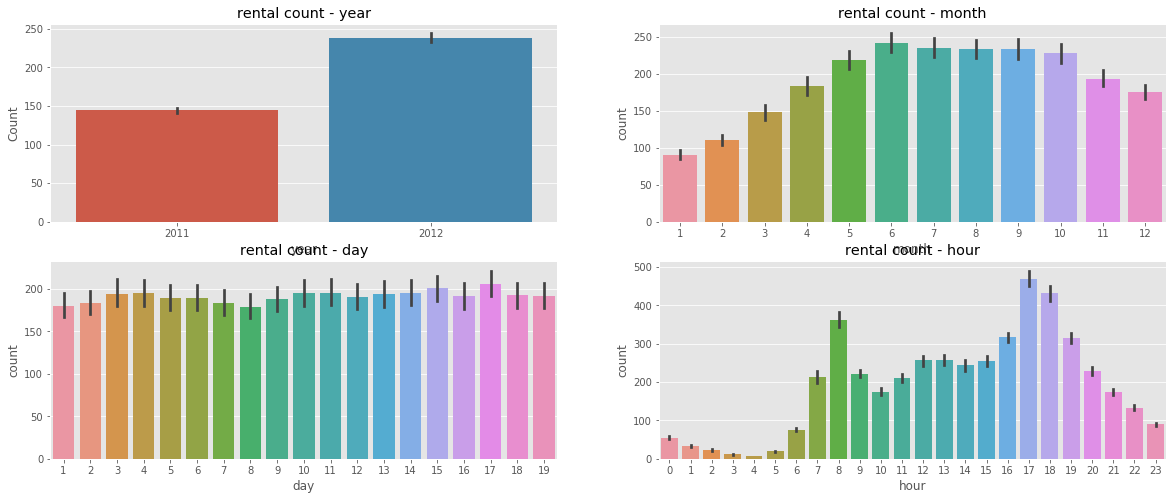

In [38]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,8)

sns.barplot(data=train,x="year",y="count",ax=ax1 )
sns.barplot(data=train,x="month",y="count",ax=ax2)
sns.barplot(data=train,x="day",y="count",ax=ax3)
sns.barplot(data=train,x="hour",y="count",ax=ax4)

ax1.set(ylabel='Count',title="rental count - year")
ax2.set(xlabel='month',title="rental count - month")
ax3.set(xlabel='day', title="rental count - day")
ax4.set(xlabel='hour', title="rental count - hour")
plt.show()

* 일별대여량은 1일부터 19일까지만 있고 나머지 날짜는 test.csv에 있다. 그래서 이 데이터는 피처로 사용하면 안 된다.
* 시간 대 대여량을 보면 출퇴근 시간에 대여량이 많은 것 같다. 하지만 주말과 나누어 볼 필요가 있을 것 같다.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'rental-by-Working day')]

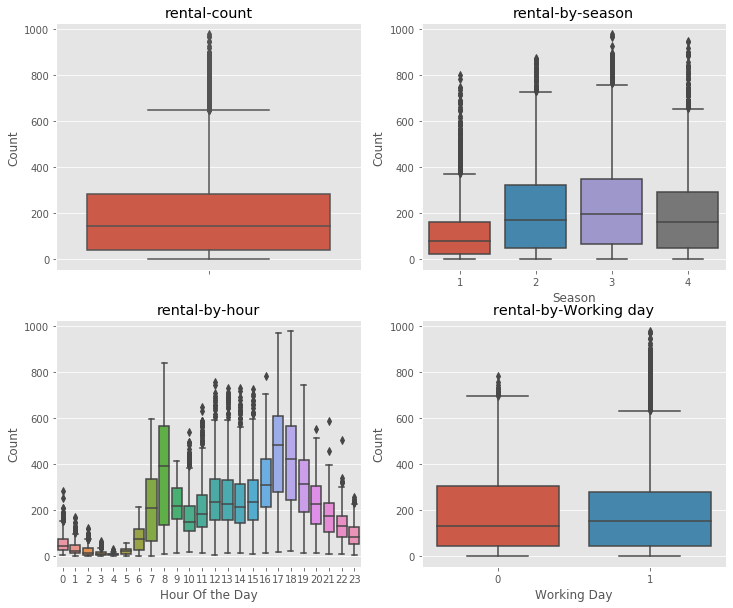

In [41]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=train,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="rental-count")
axes[0][1].set(xlabel='Season',ylabel='Count',title='rental-by-season')
axes[1][0].set(xlabel='Hour Of the Day',ylabel='Count',title='rental-by-hour')
axes[1][1].set(xlabel='Working Day',ylabel='Count',title="rental-by-Working day")

In [44]:
train["dayofweek"]=train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [46]:
train["dayofweek"].unique()

array([5, 6, 0, 1, 2, 3, 4])

In [50]:
train['dayofweek'].value_counts().sort_index()

0    1551
1    1539
2    1551
3    1553
4    1529
5    1584
6    1579
Name: dayofweek, dtype: int64

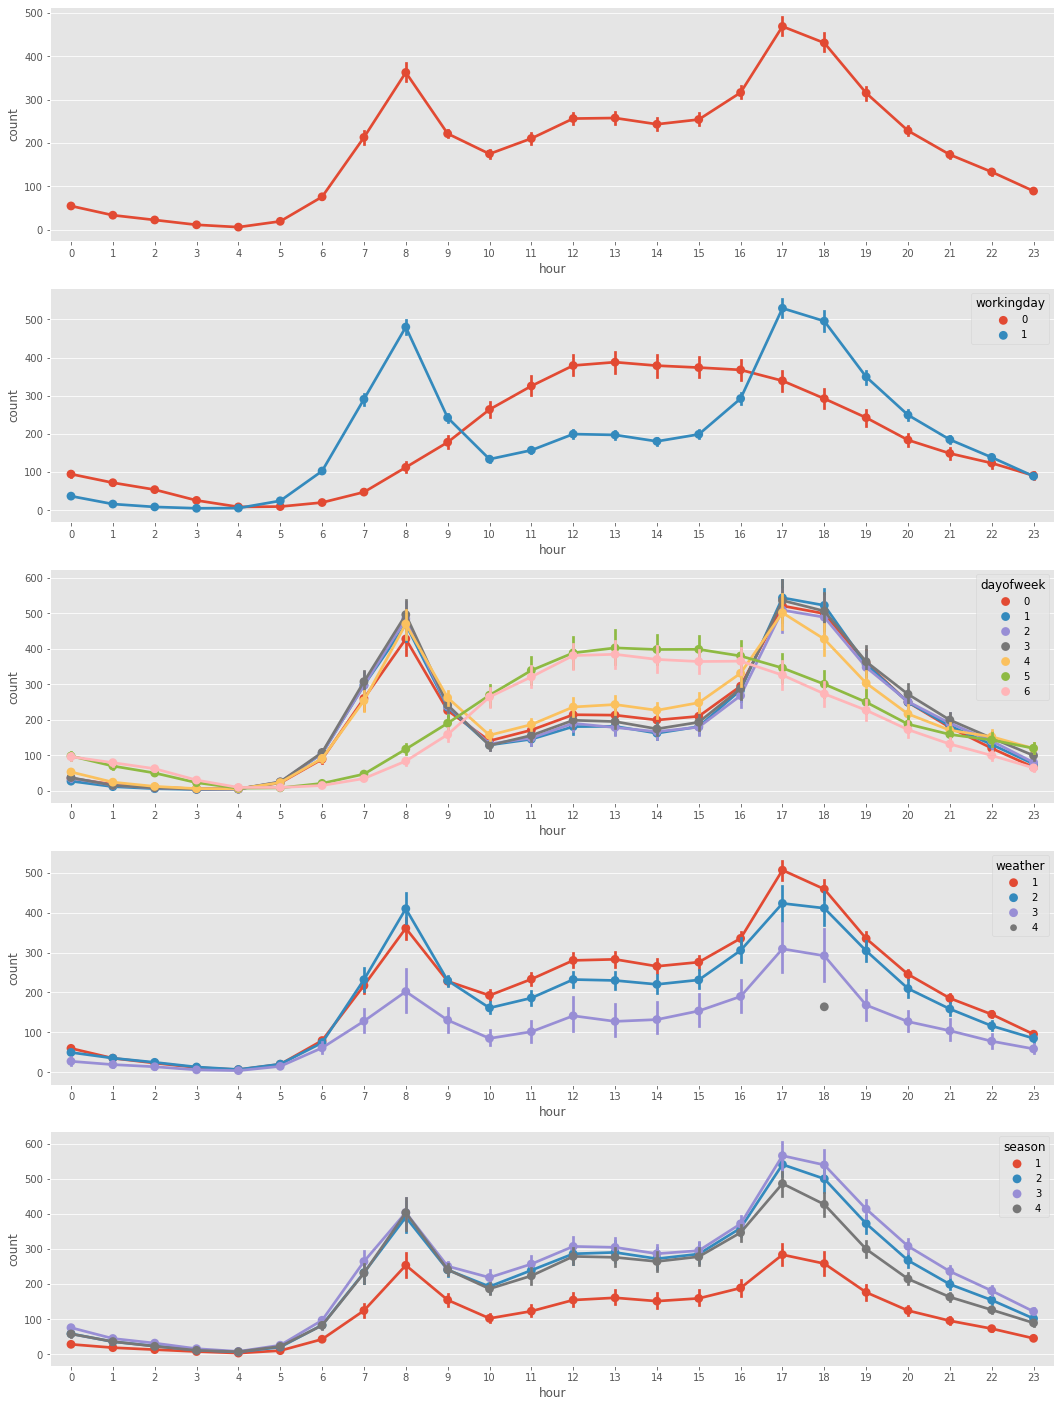

In [52]:
fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
#fig,axes=plt.subplots(nrows=5,ncols=1)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x="hour", y="count", ax=ax1)

sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2)

sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3)

sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4)

sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5)

In [61]:
# 상관관계 
corrMatt=train[["temp","atemp","casual","registered","humidity","windspeed","count"]]
corrMatt=corrMatt.corr()
corrMatt

,temp,atemp,casual,registered,humidity,windspeed,count
temp,1.000000,0.984948,0.467097,0.318571,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,0.462067,0.314635,-0.043536,-0.057473,0.389784
casual,0.467097,0.462067,1.000000,0.497250,-0.348187,0.092276,0.690414
registered,0.318571,0.314635,0.497250,1.000000,-0.265458,0.091052,0.970948
humidity,-0.064949,-0.043536,-0.348187,-0.265458,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,0.092276,0.091052,-0.318607,1.000000,0.101369
count,0.394454,0.389784,0.690414,0.970948,-0.317371,0.101369,1.000000


In [67]:
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


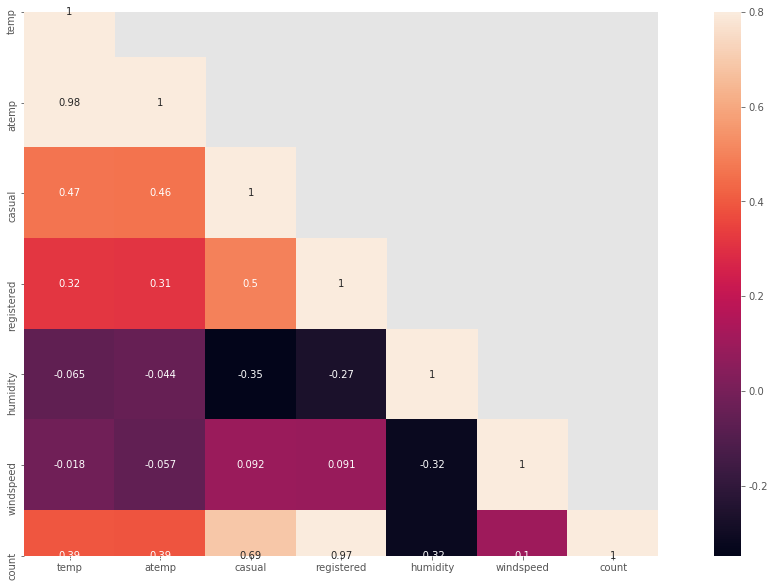

In [69]:
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt,mask=mask,vmax=.8,square=True,annot=True)

* 온도, 습도, 풍속은 거의 연관관계가 없다.
* 대여량과 가장 연관이 높은 건 registered인데, test 데이터에는 이 값이 없다.
* atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도는 유사한 피처이기 때문에 사용하기에 적합하지 않을 수 있다.

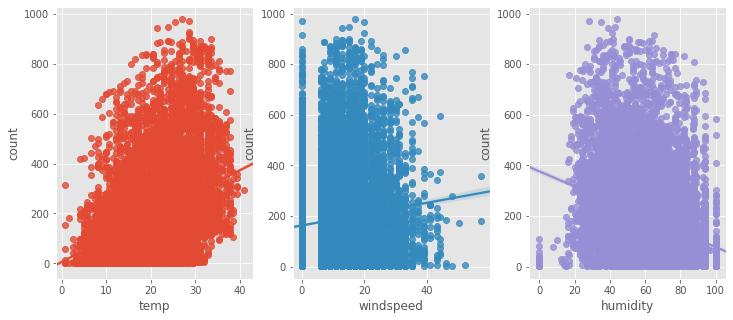

In [71]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x="temp",y="count",data=train,ax=ax1)
sns.regplot(x="windspeed",y="count",data=train, ax=ax2)
sns.regplot(x="humidity",y="count",data=train,ax=ax3)

* 풍속의 경우 0에 숫자가 몰려 있는 것으로 보인다. 아마도 관측되지 않은 수치에 대해 0으로 기록된 것이 아닐까 추측해 본다.

1) apply() lambda함수 사용할 경우

In [78]:
train['datetime'].apply(lambda x:"{0}-{1}".format(x.year,x.month))

0         2011-1
1         2011-1
2         2011-1
3         2011-1
4         2011-1
          ...   
10881    2012-12
10882    2012-12
10883    2012-12
10884    2012-12
10885    2012-12
Name: datetime, Length: 10886, dtype: object

2) 함수를 만들어서 apply() 적용할 경우


In [79]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year,datetime.month)
train["year_month"]=train['datetime'].apply(concatenate_year_month)
print(train.shape)
train[['datetime','year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


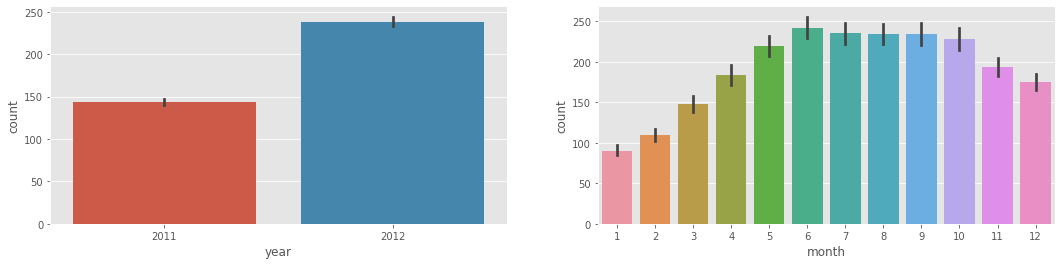

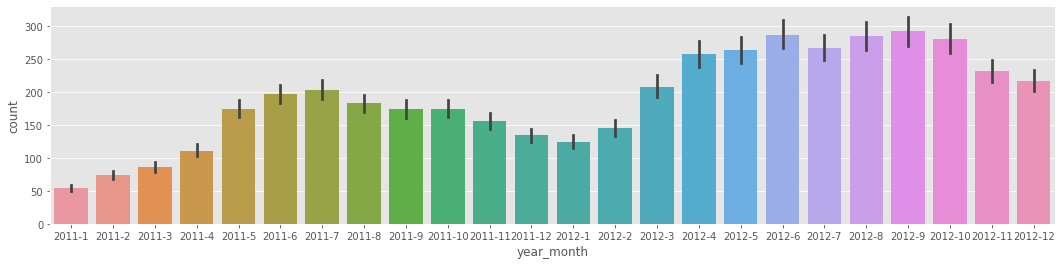

In [80]:
fig,(ax1,ax2)=plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data=train,x="year",y="count",ax=ax1)
sns.barplot(data=train,x="month",y="count",ax=ax2)

fig,ax3=plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(18,4)
sns.barplot(data=train,x="year_month",y="count",ax=ax3)
plt.show()

* 2011년보다 2012년의 대여량이 더 많다.
* 겨울보다는 여름에 대여량이 많다.
* 2011년과 2012년의 월별 데이터를 이어보면 전체적으로 증가하는 추세이다.

In [90]:
# trainWithoutOutliers
### Outlier처리 기준 : 평균적으로 평균에서 181(표준편차)정도 벗어나있는데, 이것의 3배만큼만 허용하고 나머지는 아웃라이어 취급.
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.        , 0.        , 0.        , ..., 6.59578051, 6.5971457 ,
         6.59850903])),
 (1.4096846101542893, 4.523106928071492, 0.9537631807794258))

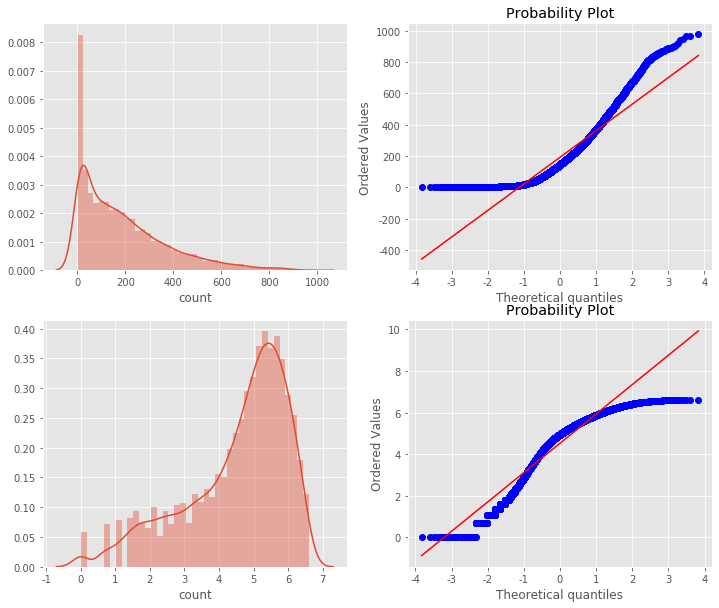

In [97]:
figure,axes=plt.subplots(ncols=2,nrows=2)
figure.set_size_inches(12,10)

sns.distplot(train["count"],ax=axes[0][0])
stats.probplot(train["count"],dist='norm',fit=True,plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers['count']),ax=axes[1][0])
stats.probplot(np.log(trainWithoutOutliers["count"]),dist='norm',fit=True,plot=axes[1][1])

In [100]:
np.log1p(trainWithoutOutliers["count"])

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10881    5.820083
10882    5.488938
10883    5.129899
10884    4.867534
10885    4.488636
Name: count, Length: 10739, dtype: float64

### Q-Q 플롯
Q-Q(Quantile-Quantile) 플롯은 분석할 표본 데이터의 분포와 정규분포의 분포 형태를 비교하여 표본 데이터가 정규분포를 따르는지 검사하는 간단한 시각적 도구다. <br>
Q-Q 플롯은 동일 분위수에 해당하는 정상 분포의 값과 주어진 데이터값을 한 쌍으로 만들어 그린 스캐터 플롯(scatter plot)이다.

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229767, 4.562423868087808, 0.958117678090961))

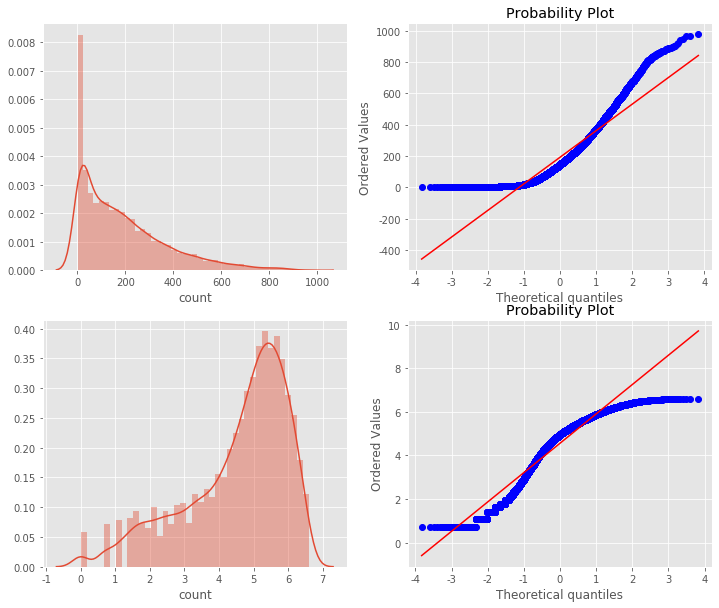

In [98]:
# count값의 데이터 분포도를 파악

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(train["count"], ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

count변수가 오른쪽에 치우쳐져 있다. 대부분의 기계학습은 종속변수가 normal 이어야 하기에 정규분포를 갖는 것이 바람직하다.<br>
대안으로 outlier data를 제거하고 "count"변수에 로그를 씌워 변경해 봐도 정규분포를 따르지는 않지만 이전 그래프보다는 좀 더 자세히 표현하고 있다.